In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from collections import Counter
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_excel("E:\DB of Ansio.xlsx")
df

,Order Id,Sequence No,Delivery Type,Created Date,Created Time,Order Status,Order Item Status,Payment Type,Location Name,Employee Id,...,Discount,Sales Return/Refunded Qty,Sales Return/Refunded Amount,Sales Return/Refunded Tax,Sales Returns/Total Refunds,Items Sold,Gross Sales,Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount),Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax),Net Total(Net Sales + Net Tax Collected)
0,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,0.0,0.00,0.0,0.0,0.0,2.0,355.36,355.36,42.64,398.0
1,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,0.0,0.00,0.0,0.0,0.0,2.0,234.00,234.00,0.00,234.0
2,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,44.7,0.00,0.0,0.0,0.0,1.0,39.91,0.00,0.00,0.0
3,2003513,\t(No Sequence No Info Available),other,2020-01-01,07:03:00,\tcompleted,\tCompleted,Cash,Z- Pallavaram,638,...,0.0,0.00,0.0,0.0,0.0,1.0,12.46,12.46,2.24,14.7
4,2003517,\t(No Sequence No Info Available),other,2020-01-01,07:09:00,\tcompleted,\tCompleted,Cash,Selaiyur Store,433,...,0.0,0.00,0.0,0.0,0.0,1.0,98.10,98.10,4.90,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213811,2249487,\t(No Sequence No Info Available),other,2020-02-02,16:29:00,\tSales Return/Refunded,\tSales Return/Refunded,E-Com Cash,Z- Pallavaram,638,...,0.0,0.25,5.0,0.0,5.0,0.0,5.00,0.00,0.00,0.0
213812,2249487,\t(No Sequence No Info Available),other,2020-02-02,16:29:00,\tSales Return/Refunded,\tSales Return/Refunded,E-Com Cash,Z- Pallavaram,638,...,0.0,0.25,15.0,0.0,15.0,0.0,15.00,0.00,0.00,0.0
213813,2249487,\t(No Sequence No Info Available),other,2020-02-02,16:29:00,\tSales Return/Refunded,\tSales Return/Refunded,E-Com Cash,Z- Pallavaram,638,...,0.0,0.25,12.5,0.0,12.5,0.0,12.50,0.00,0.00,0.0
213814,2249487,\t(No Sequence No Info Available),other,2020-02-02,16:29:00,\tSales Return/Refunded,\tSales Return/Refunded,E-Com Cash,Z- Pallavaram,638,...,0.0,1.00,30.0,0.0,30.0,0.0,30.00,0.00,0.00,0.0


In [3]:
df.shape

(213816, 52)

In [4]:
df.describe()

,Order Id,Employee Id,Phone Number,SKU,MRP,Unit Selling Price,Quantity,CESS 12%,CGST 14%,CGST 2.5%,...,Discount,Sales Return/Refunded Qty,Sales Return/Refunded Amount,Sales Return/Refunded Tax,Sales Returns/Total Refunds,Items Sold,Gross Sales,Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount),Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax),Net Total(Net Sales + Net Tax Collected)
count,2.138160e+05,213816.000000,8.490000e+02,2.138160e+05,213816.000000,213816.000000,213816.000000,213816.000000,213816.000000,213816.000000,...,213816.000000,213816.000000,213816.000000,213816.000000,213816.000000,2.138160e+05,213816.000000,213816.000000,213816.000000,213816.000000
mean,2.123780e+06,563.654867,8.881531e+09,1.308285e+05,66.615443,55.185980,0.918481,0.013169,0.016143,0.123329,...,0.919642,0.001263,0.068355,0.003651,0.072006,9.172187e-01,41.028490,40.149129,1.171171,41.320300
std,7.712494e+04,76.458086,9.744041e+08,2.129670e+05,70.786885,58.423761,2.296731,0.269581,0.355529,0.846439,...,12.780847,0.045838,6.116606,1.002899,7.049849,2.296770e+00,463.650782,463.547182,4.739266,463.874576
min,2.003504e+06,429.000000,6.379481e+09,1.000060e+05,0.000000,1.000000,0.008000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-4.440892e-16,0.120000,-0.010000,-0.010000,0.000000
25%,2.053498e+06,490.000000,7.894561e+09,1.001930e+05,25.000000,22.900000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-01,12.040000,11.890000,0.000000,11.970000
50%,2.114080e+06,559.000000,9.003524e+09,1.002750e+05,49.000000,40.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,24.000000,23.500000,0.000000,24.000000
75%,2.189007e+06,637.000000,9.840822e+09,2.009590e+05,85.000000,69.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,46.500000,45.520000,0.000000,46.800000
max,3.233248e+06,663.000000,9.962578e+09,9.619001e+07,3999.000000,2998.850000,640.000000,34.970000,48.259100,68.457200,...,1749.000000,6.000000,2541.400000,457.450000,2998.850000,6.400000e+02,153600.000000,153600.000000,462.280000,153600.000000


In [5]:
df.describe(include='object')

,Sequence No,Delivery Type,Created Time,Order Status,Order Item Status,Payment Type,Location Name,Employee Name,Customer Name,Customer Code,TRN/GSTIN,Item Name,Variation Name,Category,HSN,Unit Of Measure,Tax Rate %
count,213816,213816,213816,213816,213816,213816,213816,213816,213816,213816,213816,213816,213816,213816,56949,213816,213816
unique,4,1,1014,3,3,7,9,38,88,21,1,2431,2426,19,315,3,9
top,\t(No Sequence No Info Available),other,19:32:00,\tcompleted,\tCompleted,Cash,Neelankarai Store,prathap,\t(No Customer Specified),(No Customer Code),,Tomato -Naattu Thakkalli,Tomato -Naattu Thakkalli,Vegetables,4012000,weight,\t0 %
freq,213730,213816,655,213297,213565,95648,37923,26225,212967,213430,213816,7652,7652,125617,5771,125487,172218


In [6]:
df["Created Date"]

0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
213811   2020-02-02
213812   2020-02-02
213813   2020-02-02
213814   2020-02-02
213815   2020-02-02
Name: Created Date, Length: 213816, dtype: datetime64[ns]

In [7]:
imp_df = df[["MRP","Unit Selling Price","Quantity",'Discount',
 'Sales Return/Refunded Qty',
 'Sales Return/Refunded Amount',
 'Sales Return/Refunded Tax',
 'Sales Returns/Total Refunds',
 'Items Sold',
 'Gross Sales',
 'Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount)',
 'Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax)',
 'Net Total(Net Sales + Net Tax Collected)']]

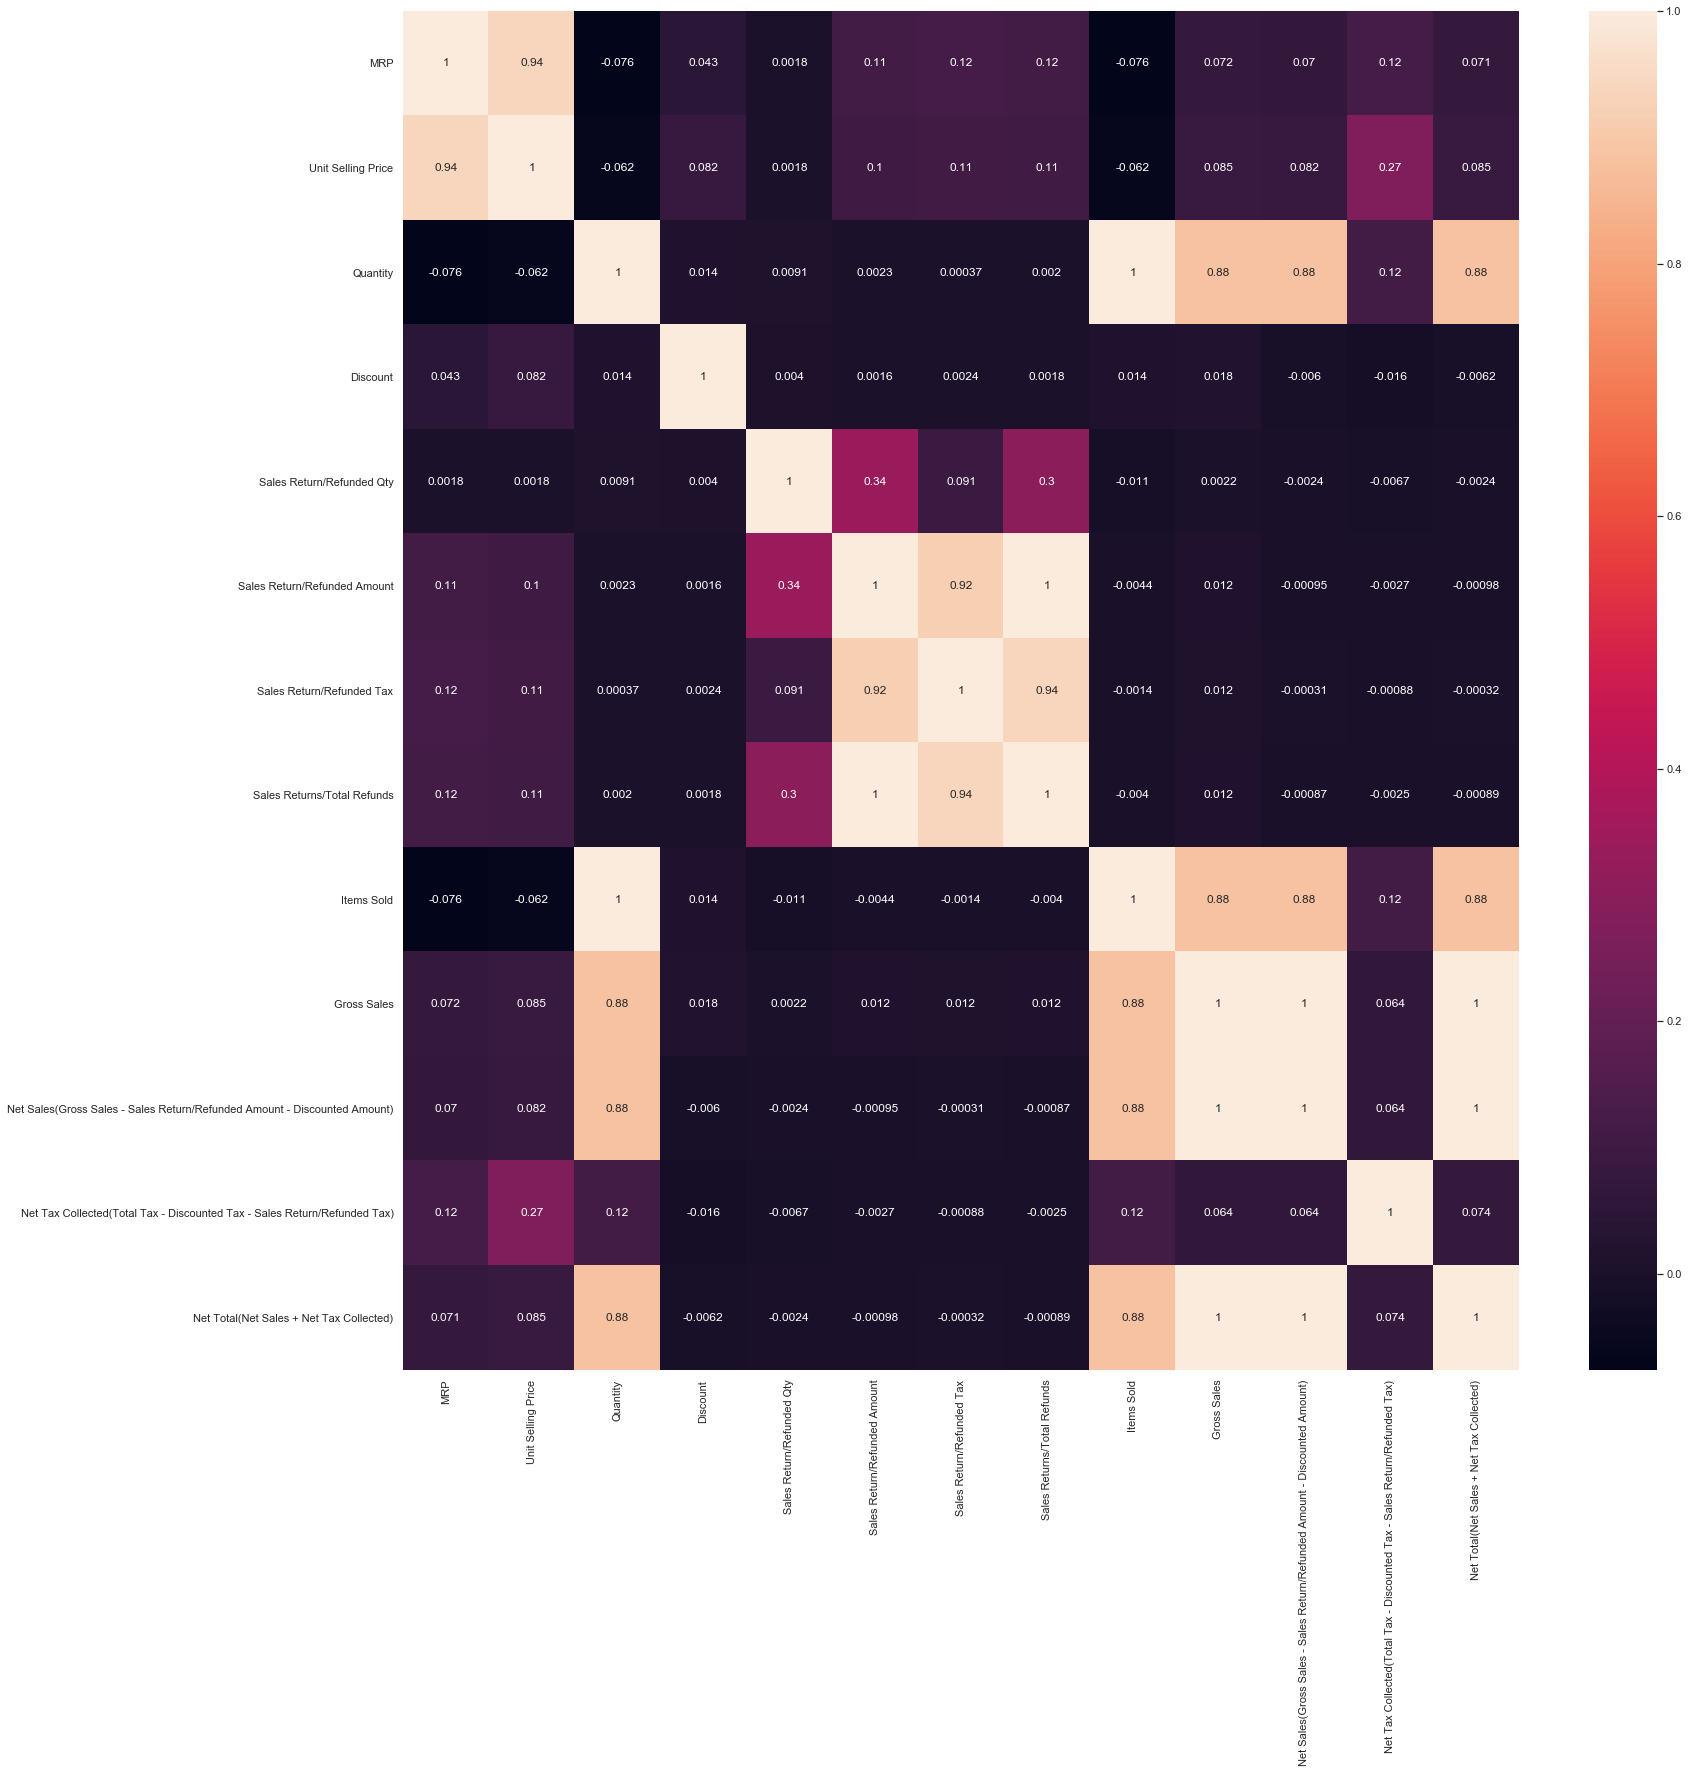

In [8]:
plt.subplots(figsize=(25,25))
sns.heatmap(imp_df.corr(),annot=True)

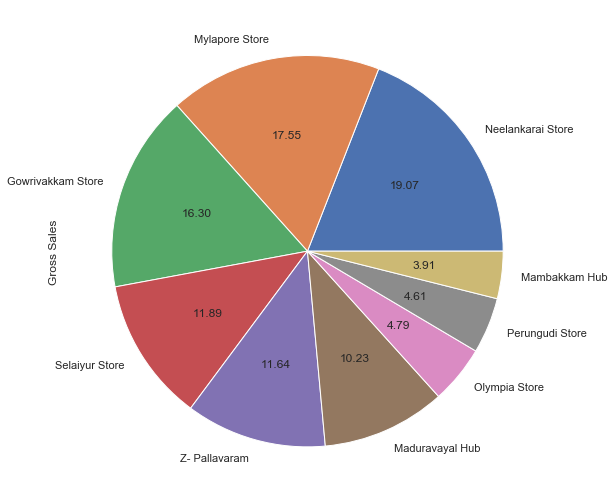

In [9]:
plt.subplots(figsize=(9,9))
df.groupby("Location Name")["Gross Sales"].sum().sort_values(ascending=False).plot(kind="pie",autopct="%.2f")

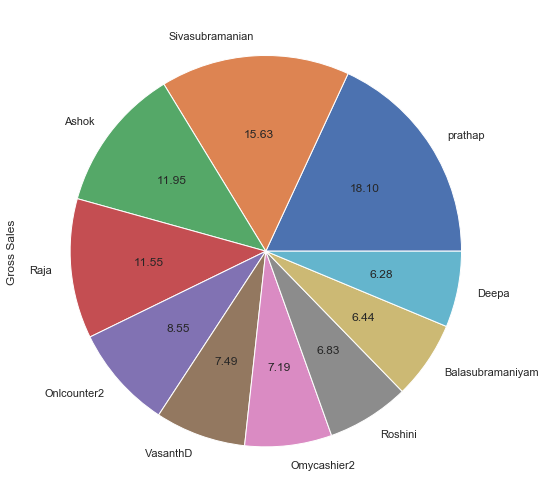

In [10]:
plt.subplots(figsize=(9,9))
df.groupby("Employee Name")["Gross Sales"].sum().sort_values(ascending=False).head(10).plot(kind="pie",autopct="%.2f")

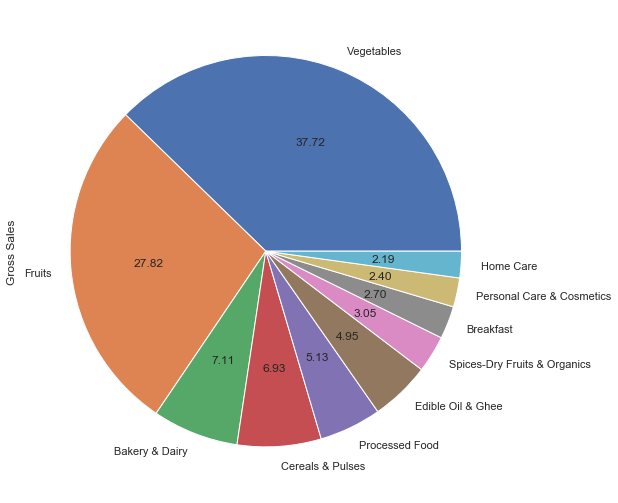

In [11]:
plt.subplots(figsize=(9,9))
df.groupby("Category")["Gross Sales"].sum().sort_values(ascending=False).head(10).plot(kind="pie",autopct="%.2f")

In [12]:
quantity_upd=[]
for i,row in df.iterrows():
    row["Quantity"] = float(row["Quantity"])
    if row["Unit Of Measure"] != "weight":
        quantity_upd.append(row["Quantity"])
    else:
        quantity_upd.append(np.ceil(row["Quantity"]))

In [13]:
df["quantity_upd"] = quantity_upd

In [14]:
df.groupby("Category")['quantity_upd'].sum().sort_values(ascending=False)

Category
Vegetables                      149968.0000
Fruits                           41284.0000
Bakery & Dairy                   19451.0000
Processed Food                   19260.0000
Cereals & Pulses                  6867.9321
Spices-Dry Fruits & Organics      6288.0000
Snacks & Beverages                4649.0000
Breakfast                         3976.0000
Home Care                         3841.0000
Personal Care & Cosmetics         3515.0000
Edible Oil & Ghee                 3469.0000
Atta, Flours, Salt & Sugar        3345.1000
Kitchen Accessories               1688.0000
Bakery, Dairy & Frozen            1111.0000
Home Needs & Home Upkeep           783.0000
Healthdrinks                       236.0000
Beverages                          195.0000
School & Office Stationary         141.0000
General Merchandise                  2.0000
Name: quantity_upd, dtype: float64

In [15]:
df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)

Category
Vegetables                      91903.9914
Fruits                          25839.8320
Bakery & Dairy                  19451.0000
Processed Food                  19260.0000
Cereals & Pulses                 6739.1531
Spices-Dry Fruits & Organics     6288.0000
Snacks & Beverages               4649.0000
Breakfast                        3976.0000
Home Care                        3841.0000
Personal Care & Cosmetics        3515.0000
Edible Oil & Ghee                3469.0000
Atta, Flours, Salt & Sugar       3298.0330
Kitchen Accessories              1688.0000
Bakery, Dairy & Frozen           1111.0000
Home Needs & Home Upkeep          783.0000
Healthdrinks                      236.0000
Beverages                         195.0000
School & Office Stationary        141.0000
General Merchandise                 2.0000
Name: Quantity, dtype: float64

In [16]:
df.groupby(["Location Name","Category"])["Gross Sales"].sum().sort_values(ascending=False)

Location Name      Category                  
Neelankarai Store  Vegetables                    660348.70
                   Fruits                        596506.05
Mylapore Store     Vegetables                    557880.84
Gowrivakkam Store  Vegetables                    513968.66
Maduravayal Hub    Fruits                        389823.39
                                                   ...    
Mambakkam Hub      Home Needs & Home Upkeep         136.73
                   School & Office Stationary       107.14
Z- Pallavaram      School & Office Stationary        55.71
Maduravayal Hub    Kitchen Accessories               47.46
Mambakkam Hub      Kitchen Accessories               37.29
Name: Gross Sales, Length: 146, dtype: float64

In [17]:
df["Created_month"]=df["Created Date"].dt.month_name()

In [18]:
df[df.Category=="Vegetables"].groupby("Created_month")['Gross Sales'].sum()

Created_month
February     196939.77
January     2946381.14
Name: Gross Sales, dtype: float64

In [19]:
df["Created_week"] = df["Created Date"].dt.week

In [20]:
df["Created_week"] = df["Created_week"].apply(lambda x: "week "+str(x))

Text(0.5, 1.0, 'Gross Sales of vegetables')

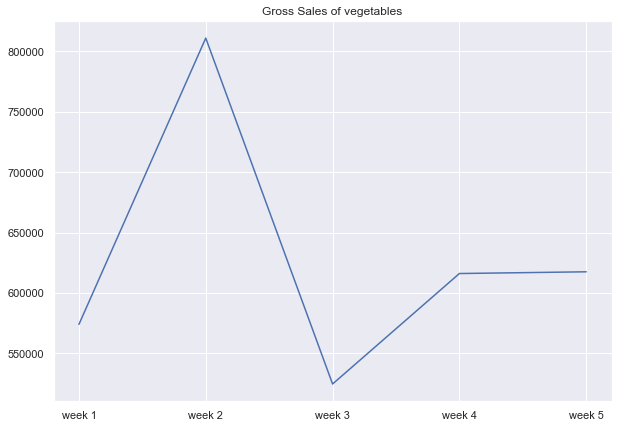

In [21]:
plt.subplots(figsize=(10,7))
plt.plot(df[df.Category=="Vegetables"].groupby('Created_week')['Gross Sales'].sum())
plt.title("Gross Sales of vegetables")

In [22]:
df_veg = df[df.Category=="Vegetables"][["Created_week","Gross Sales"]]

In [23]:
df_veg = df_veg.groupby(by=['Created_week'],as_index=False)['Gross Sales'].sum()

In [24]:
df_veg = df_veg.set_index("Created_week")

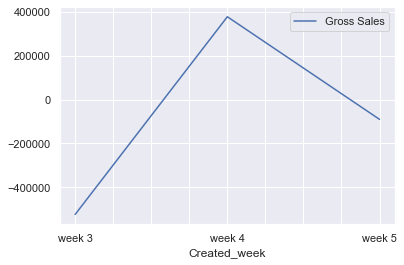

In [25]:
df_veg_diff = df_veg.diff(periods=1)[1:].diff(periods=1)[1:]
df_veg_diff.plot()

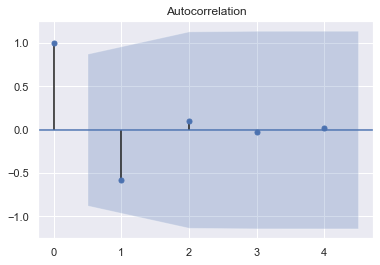

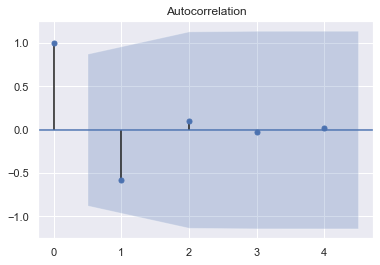

In [26]:
plot_acf(df_veg)

In [27]:
print("There is a negative dip, data not stationery")

There is a negative dip, data not stationery


Text(0.5, 1.0, 'Rolling test statistics')

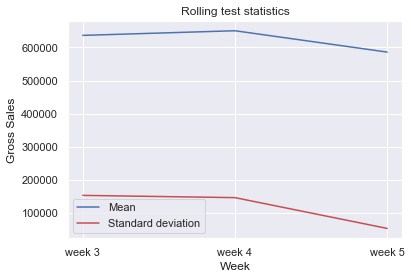

In [28]:
plt.plot(df_veg.rolling(window=3).mean(),color='b',label='Mean')
plt.plot(df_veg.rolling(window=3).std(),color='r',label='Standard deviation')
plt.legend(loc='best')
plt.xlabel("Week",color='k')
plt.ylabel("Gross Sales",color='k')
plt.title("Rolling test statistics")

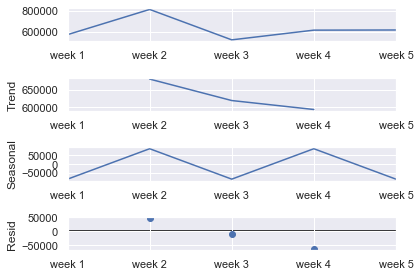

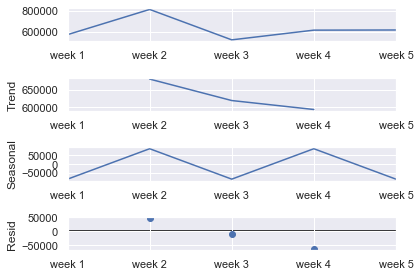

In [29]:
splot=seasonal_decompose(df_veg,model='additive',freq=2)
splot.plot()

In [30]:
df_test = adfuller(df_veg['Gross Sales'],autolag='AIC')
#agumentes dickyfuller test

In [31]:
print("P-value:",df_test[1])
print("The data is stationary")
#if P is less than 0.05 it is sattionary

P-value: 0.04068113691828517
The data is stationary


In [32]:
df_veg

,Gross Sales
Created_week,
week 1,574018.06
week 2,811004.84
week 3,524657.09
week 4,616102.83
week 5,617538.09


In [33]:
df_veg.shape

(5, 1)

In [34]:
p=i=q=range(0,5)
piq = itertools.product(p,i,q)
piq=list(piq)

In [35]:
for param in piq:
    try:
        model = ARIMA(df_veg,order=param)
        results_AR = model.fit(disp=-1)
        print(param,results_AR.aic)
    except:
        continue
#checking the combination in which is error is less
#arima=it is a linera line with combination of auto regression and moving avg., it is one of the best model

(0, 0, 0) 133.04460234325842
(0, 0, 1) nan
(0, 0, 2) nan
(0, 1, 0) 112.63515339009754
(1, 0, 0) 133.1508815210547
(1, 1, 0) 111.37062415757153
(2, 0, 0) 134.68015376194006


In [36]:
model = ARIMA(df_veg,order=(1, 1, 0))
results_AR = model.fit()
print(param,results_AR.aic)

#using 1,1,0 bcz is has the less error

(4, 4, 4) 111.37062415757153


In [37]:
df_veg

,Gross Sales
Created_week,
week 1,574018.06
week 2,811004.84
week 3,524657.09
week 4,616102.83
week 5,617538.09


In [38]:
results_AR.predict(start=len(df_veg),end=len(df_veg)+3)

4   -37985.668915
5    -6196.219386
6   -31831.564091
7   -11158.953905
dtype: float64

In [39]:
results_AR.forecast(steps=3)

(array([579552.42108549, 573356.20169907, 541524.63760805]),
 array([111419.24052347, 113487.86176967, 147377.91536127]),
 array([[361174.72247469, 797930.11969629],
        [350924.07994805, 795788.32345009],
        [252669.23138337, 830380.04383274]]))

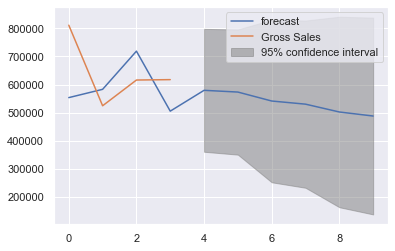

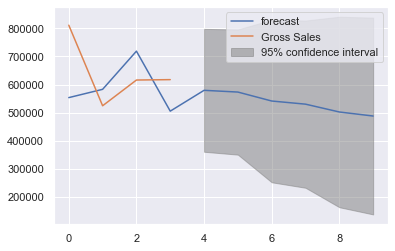

In [40]:
results_AR.plot_predict(1,10)